# Day 08. Exercise 00
# Binary classifier. Logistic regression

## 0. Imports

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

## 1. Preprocessing

- Get the data from the file [`checker-timestamp.csv`](https://drive.google.com/file/d/1pooM4cITtG249msX3GK_6W0eEiblzAf5/view?usp=sharing).


- Create a dataframe `df` with the columns: `date`, `am`, `pm`, `target`, where `date` is the date of the day, `am` is the number of the commits during the day before midday (integer), `pm` is the number of commits during the day after midday (integer), `target` is weekend/working_day.

In [17]:
df = pd.read_csv(
	'../data/checker_timestamp.csv'
)
df['timestamp']=pd.to_datetime(df['timestamp'])
df['date']=df['timestamp'].dt.date
df['hour']=df['timestamp'].dt.hour
df['am']=df['hour']<12
df['pm']=df['hour']>=12
df['target']=df['timestamp'].dt.day_of_week
df['target']=df['target'].map(lambda x: 'working_day' if int(x)<5 else 'weekend')
df

,timestamp,date,hour,am,pm,target
0,2020-04-17 05:19:02.744528,2020-04-17,5,True,False,working_day
1,2020-04-17 05:22:35.249331,2020-04-17,5,True,False,working_day
2,2020-04-17 05:22:45.549397,2020-04-17,5,True,False,working_day
3,2020-04-17 05:34:14.691200,2020-04-17,5,True,False,working_day
4,2020-04-17 05:34:24.422370,2020-04-17,5,True,False,working_day
...,...,...,...,...,...,...
3202,2020-05-21 20:19:06.872761,2020-05-21,20,False,True,working_day
3203,2020-05-21 20:22:41.785725,2020-05-21,20,False,True,working_day
3204,2020-05-21 20:22:41.877806,2020-05-21,20,False,True,working_day
3205,2020-05-21 20:37:00.129678,2020-05-21,20,False,True,working_day


In [18]:
df=df.groupby(['date','target']).agg({'am':'sum','pm':'sum'}).reset_index()
df

,date,target,am,pm
0,2020-04-17,working_day,21,2
1,2020-04-18,weekend,1,68
2,2020-04-19,weekend,18,15
3,2020-04-20,working_day,2,23
4,2020-04-21,working_day,0,25
5,2020-04-22,working_day,0,28
6,2020-04-23,working_day,10,33
7,2020-04-24,working_day,2,14
8,2020-04-25,weekend,30,74
9,2020-04-26,weekend,28,233


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    35 non-null     object
 1   target  35 non-null     object
 2   am      35 non-null     int64 
 3   pm      35 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


## 2. Exploratory analysis

- Create a plot where `x` is am, `y` is pm, each dot is a day, working days and weekends must have different colors.


- By looking at the graph do you think it will be easy to classify the days having those two features? Put your answer in the markdown cell in the end of that sectioin: "yes, it is easy" or "no, it is not easy".

<Axes: xlabel='am', ylabel='pm'>

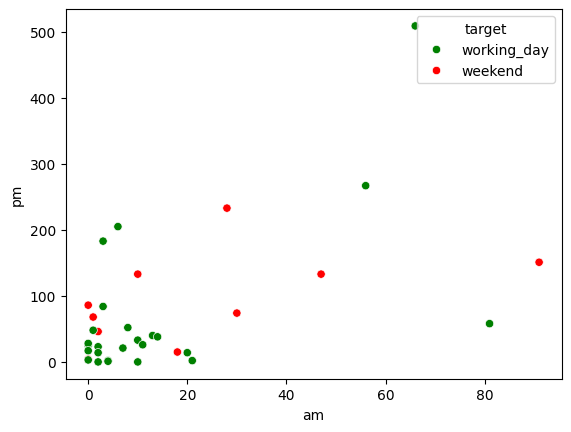

In [20]:
sns.scatterplot(data=df, x='am',palette={"weekend":"#ff0000", "working_day":"#008000"}, y='pm',hue='target')

By looking at the graph do you think it will be easy to classify the days having those two features?<br>
no, it is not easy

## 3. Logistic regression

- Train logistic regression on your data using `am` and `pm`, parameters are: `random state=21`, `fit_intercept=False`.


- Make predictions for every day of your dataset and add them to your dataframe with the column name `predict`.


- Save the dataframe into a file in the subfolder of the day `data` with the name `am_pm.csv`.


- Draw another plot like you did before, but the color should be taken from the `predict`.


- By looking at the graph do you think if it made good predictions? Put your answer in the markdown cell in the end of that section: "yes, it is good"; "no, it is not good".

In [21]:
X = np.asarray(df[['am','pm']])
y = np.asarray(df['target'])
y

array(['working_day', 'weekend', 'weekend', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'weekend', 'weekend',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'weekend', 'weekend', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'weekend', 'weekend',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'weekend', 'weekend', 'working_day', 'working_day',
       'working_day', 'working_day'], dtype=object)

In [22]:
sm.Logit([1 if item=='working_day' else 0 for item in y],X).fit().summary2()

Optimization terminated successfully.
         Current function value: 0.678190
         Iterations 4


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
==============================================================
Model:              Logit            Method:           MLE    
Dependent Variable: y                Pseudo R-squared: -0.134 
Date:               2025-09-04 18:25 AIC:              51.4733
No. Observations:   35               BIC:              54.5840
Df Model:           1                Log-Likelihood:   -23.737
Df Residuals:       33               LL-Null:          -20.939
Converged:          1.0000           LLR p-value:      1.0000 
No. Iterations:     4.0000           Scale:            1.0000 
----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
----------------------------------------------------------------
x1      -0.0004     0.0169   -0.0228   0.9818   -0.0336   0.0328
x2       0.0030     0.0041    0.7239   0.4691   -0.0051   0.0111
==============================================================

"""

In [23]:
model = LogisticRegression(random_state=21, fit_intercept=False)

In [24]:
model.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
df['predict'] = model.predict(X)
df

,date,target,am,pm,predict
0,2020-04-17,working_day,21,2,weekend
1,2020-04-18,weekend,1,68,working_day
2,2020-04-19,weekend,18,15,working_day
3,2020-04-20,working_day,2,23,working_day
4,2020-04-21,working_day,0,25,working_day
5,2020-04-22,working_day,0,28,working_day
6,2020-04-23,working_day,10,33,working_day
7,2020-04-24,working_day,2,14,working_day
8,2020-04-25,weekend,30,74,working_day
9,2020-04-26,weekend,28,233,working_day


In [27]:
df.to_csv('../data/am_pm.csv', index=False)

<Axes: xlabel='am', ylabel='pm'>

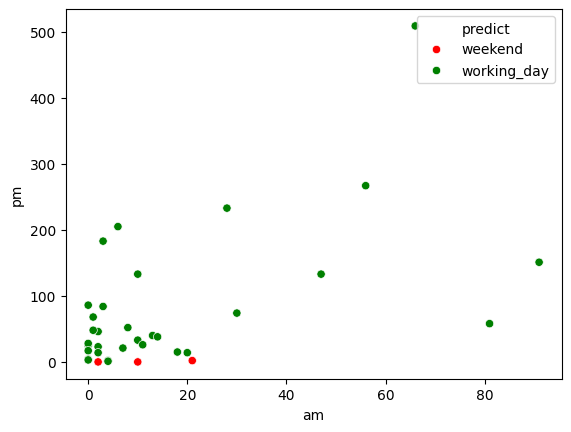

In [28]:
sns.scatterplot(data=df, x='am', y='pm', palette={"weekend":"#ff0000", "working_day":"#008000"},hue='predict')

By looking at the graph do you think if it made good predictions?<br>no, it is not good

## 4. Evaluation

- Calculate `accuracy` for your predictions.


- Calculate `accuracy` for the naive case when each of your prediction is the value of your most popular class of the day.


- Comparing the accuracies do you think that the classifier made good predictions? Put your answer in the markdown cell in the end of the secion: "yes, it is good"; "no, it is not good".

In [29]:
f"Accuracy model: {metrics.accuracy_score(df['target'],df['predict'])}"

'Accuracy model: 0.6285714285714286'

In [30]:
df_group=df.groupby('target').size().reset_index()
most_popular_type=df_group[df_group[0]==df_group[0].max()]['target'].head(1).to_list()[0]
most_popular_type

'working_day'

In [31]:
f"Accuracy native model: {metrics.accuracy_score(df['target'],[most_popular_type for _ in range(len(df['predict']))])}"

'Accuracy native model: 0.7142857142857143'

Comparing the accuracies do you think that the classifier made good predictions?<br>no, it is not good